# EDA Report of Global Mental health Data
### Student Name : Ali Shoaib
### Stutent Roll No: NIM-BSCS-2021-33
### Intructor : Mohammad Bilal

## Task No 3: Python Implementation

#### Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Data file and use short names for Columns

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv("mental-illnesses-prevalence.csv")

# Create a dictionary mapping original column names to short names
short_names = {
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating'
}

# Rename columns in the DataFrame using short names
df.rename(columns=short_names, inplace=True)

print(df)

           Entity Code  Year  Schizophrenia  Depressive   Anxiety   Bipolar  \
0     Afghanistan  AFG  1990       0.223206    4.996118  4.713314  0.703023   
1     Afghanistan  AFG  1991       0.222454    4.989290  4.702100  0.702069   
2     Afghanistan  AFG  1992       0.221751    4.981346  4.683743  0.700792   
3     Afghanistan  AFG  1993       0.220987    4.976958  4.673549  0.700087   
4     Afghanistan  AFG  1994       0.220183    4.977782  4.670810  0.699898   
...           ...  ...   ...            ...         ...       ...       ...   
6415     Zimbabwe  ZWE  2015       0.201042    3.407624  3.184012  0.538596   
6416     Zimbabwe  ZWE  2016       0.201319    3.410755  3.187148  0.538593   
6417     Zimbabwe  ZWE  2017       0.201639    3.411965  3.188418  0.538589   
6418     Zimbabwe  ZWE  2018       0.201976    3.406929  3.172111  0.538585   
6419     Zimbabwe  ZWE  2019       0.202482    3.395476  3.137017  0.538580   

        Eating  
0     0.127700  
1     0.123256  


#### Find Descriptive Statistics for all numeric Columns

In [6]:

# Rename columns in the DataFrame using short names
df.rename(columns=short_names, inplace=True)

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column contains numeric values
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate descriptive statistics for the numeric column
        mean_value = df[column].mean()
        mode_value = df[column].mode().iloc[0]  # Mode might return multiple values, so we take the first one
        median_value = df[column].median()
        variance_value = df[column].var()
        std_dev_value = df[column].std()

        # Print the statistics for the column
        print(f"\nColumn: {column}")
        print(f"Mean: {mean_value}")
        print(f"Mode: {mode_value}")
        print(f"Median: {median_value}")
        print(f"Variance: {variance_value}")
        print(f"Standard Deviation: {std_dev_value}")


Column: Year
Mean: 2004.5
Mode: 1990
Median: 2004.5
Variance: 74.92833774731267
Standard Deviation: 8.656115626960668

Column: Schizophrenia
Mean: 0.26660410361214953
Mode: 0.2116415
Median: 0.27347716499999997
Variance: 0.0015510073366489547
Standard Deviation: 0.03938283048041309

Column: Depressive
Mean: 3.767035886853583
Mode: 2.9647393
Median: 3.6367716999999997
Variance: 0.8561538742698497
Standard Deviation: 0.9252858338210143

Column: Anxiety
Mean: 4.101839659922118
Mode: 3.531769
Median: 3.9395473
Variance: 1.10364080393327
Standard Deviation: 1.0505430995124712

Column: Bipolar
Mean: 0.636968395228972
Mode: 0.54847974
Median: 0.5793314
Variance: 0.05447124853970372
Standard Deviation: 0.2333907636126668

Column: Eating
Mean: 0.19566409069797508
Mode: 0.0658978
Median: 0.144150375
Variance: 0.01914908557740843
Standard Deviation: 0.13838022104841582


# Graphical Visualizations of Overall Data

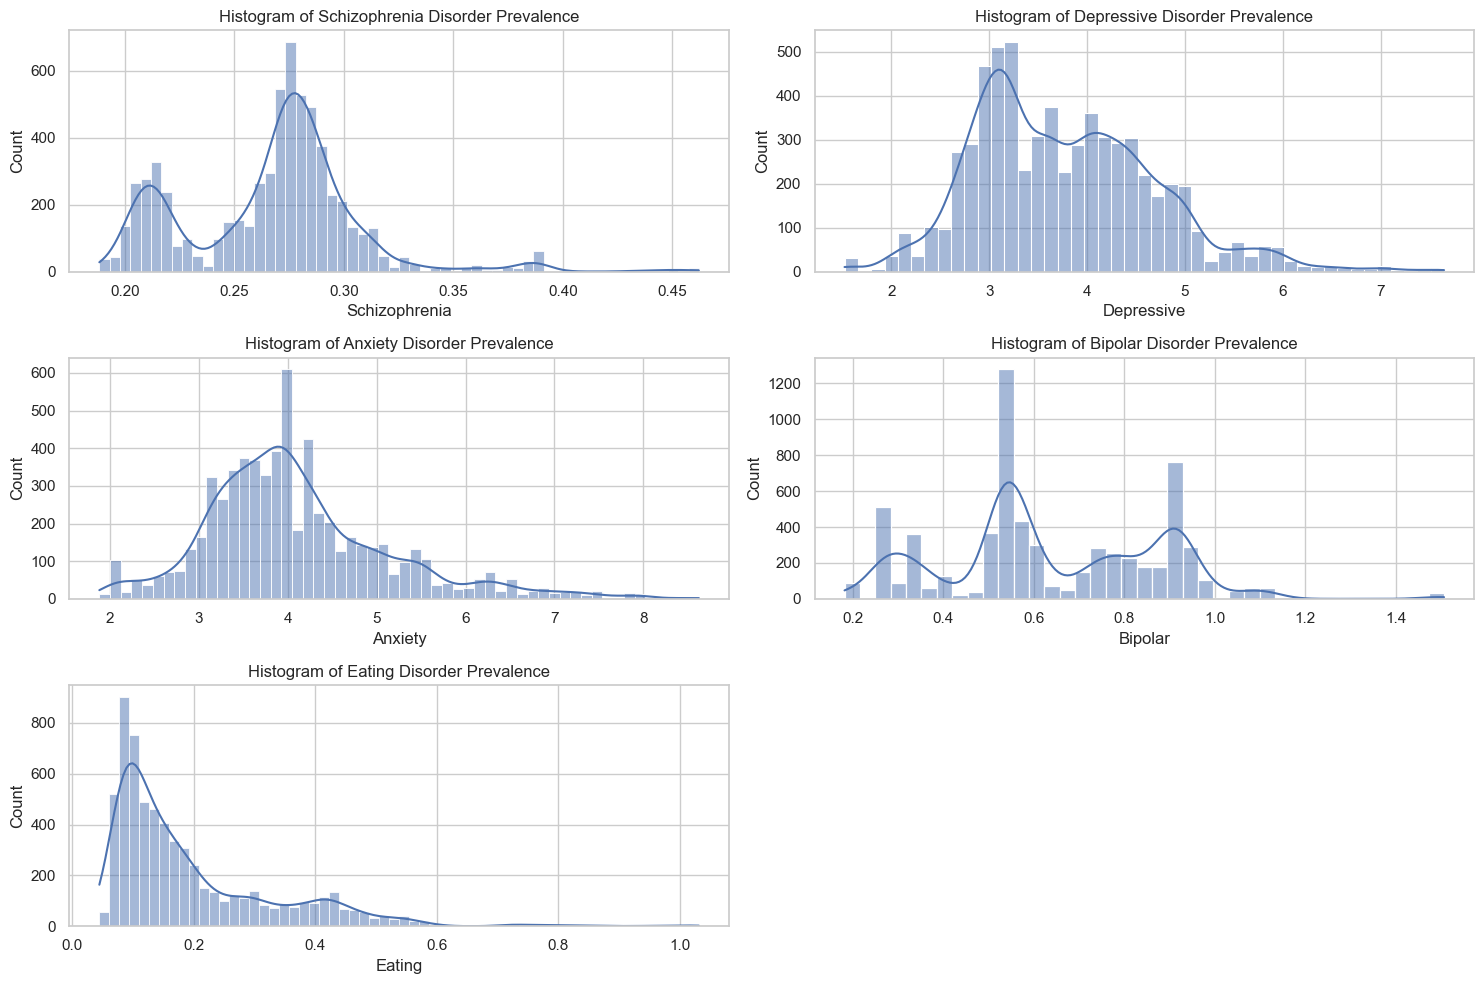

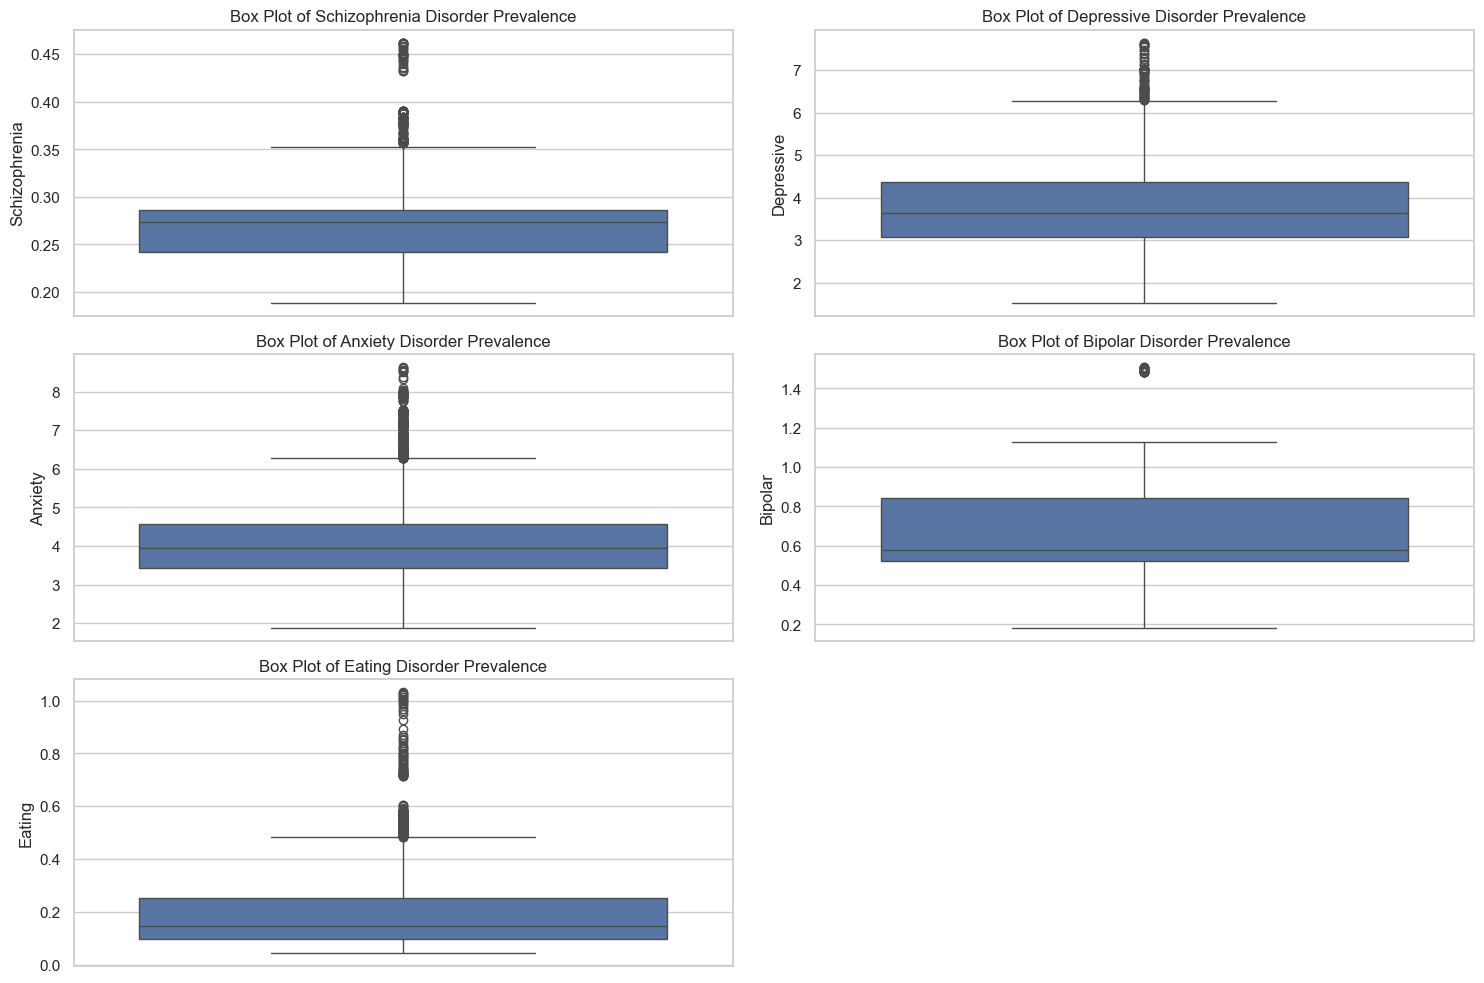

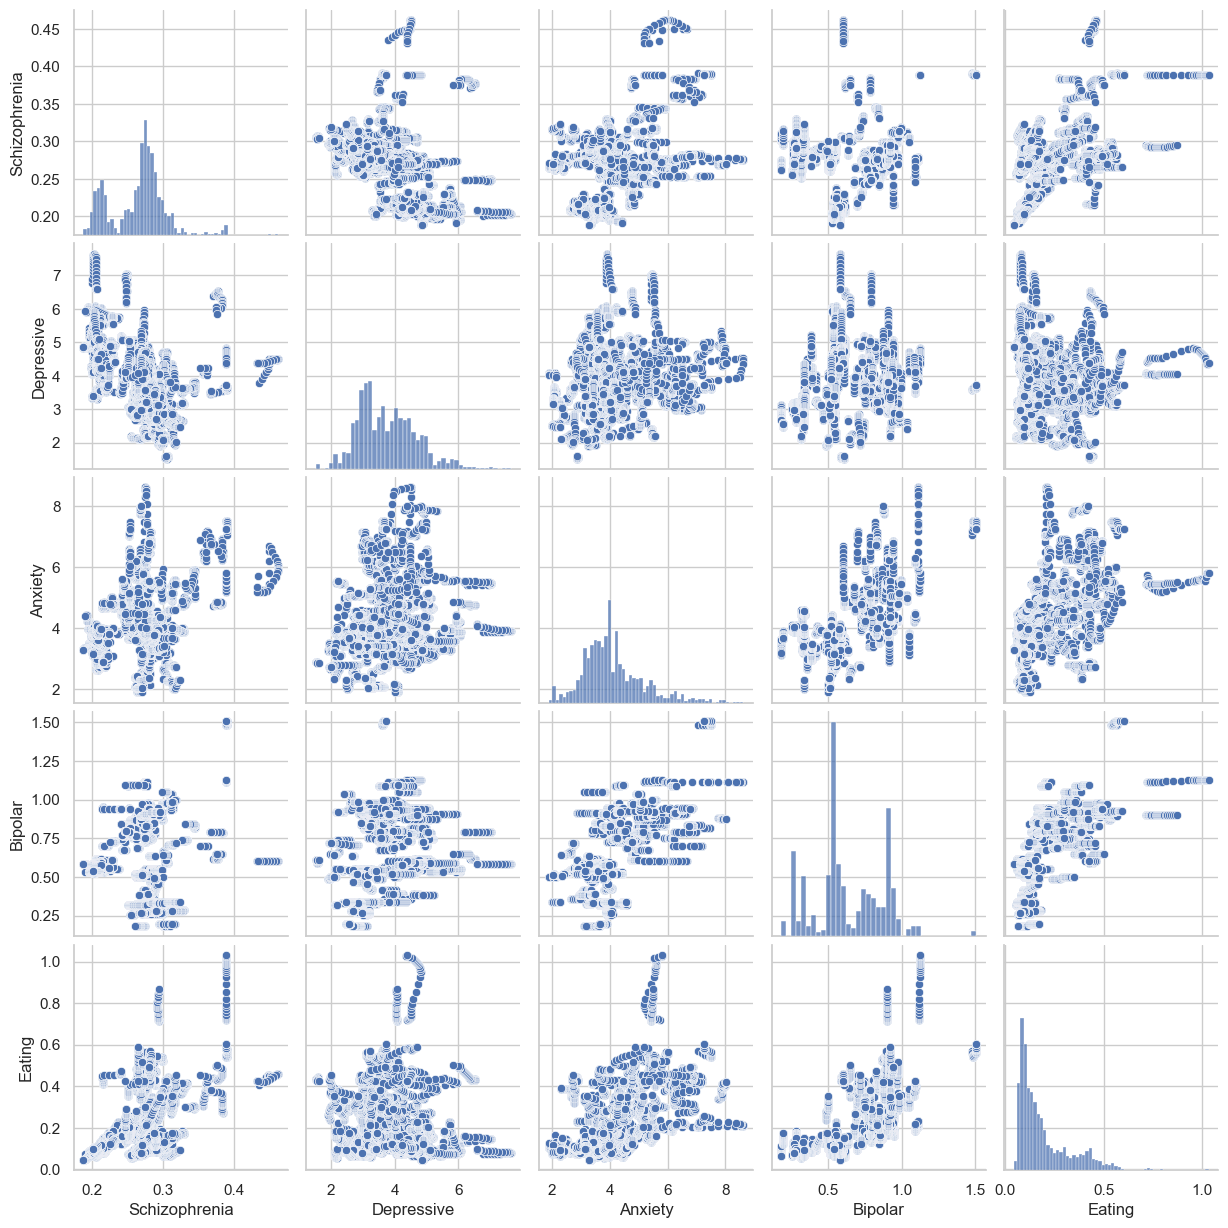

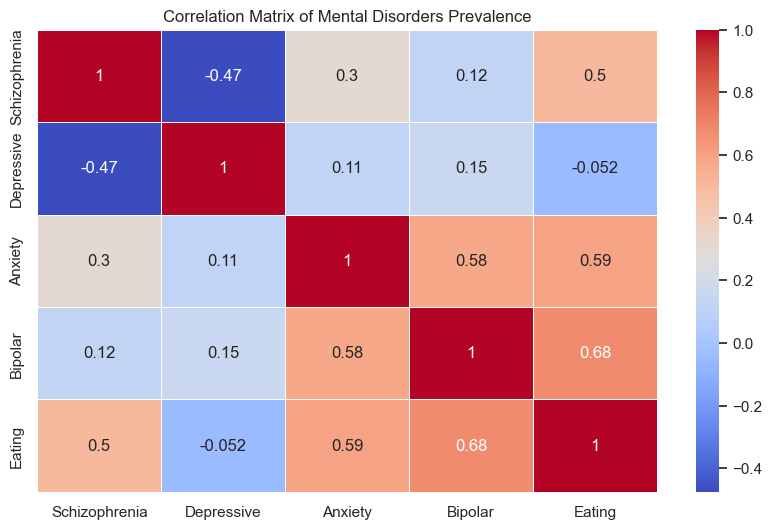

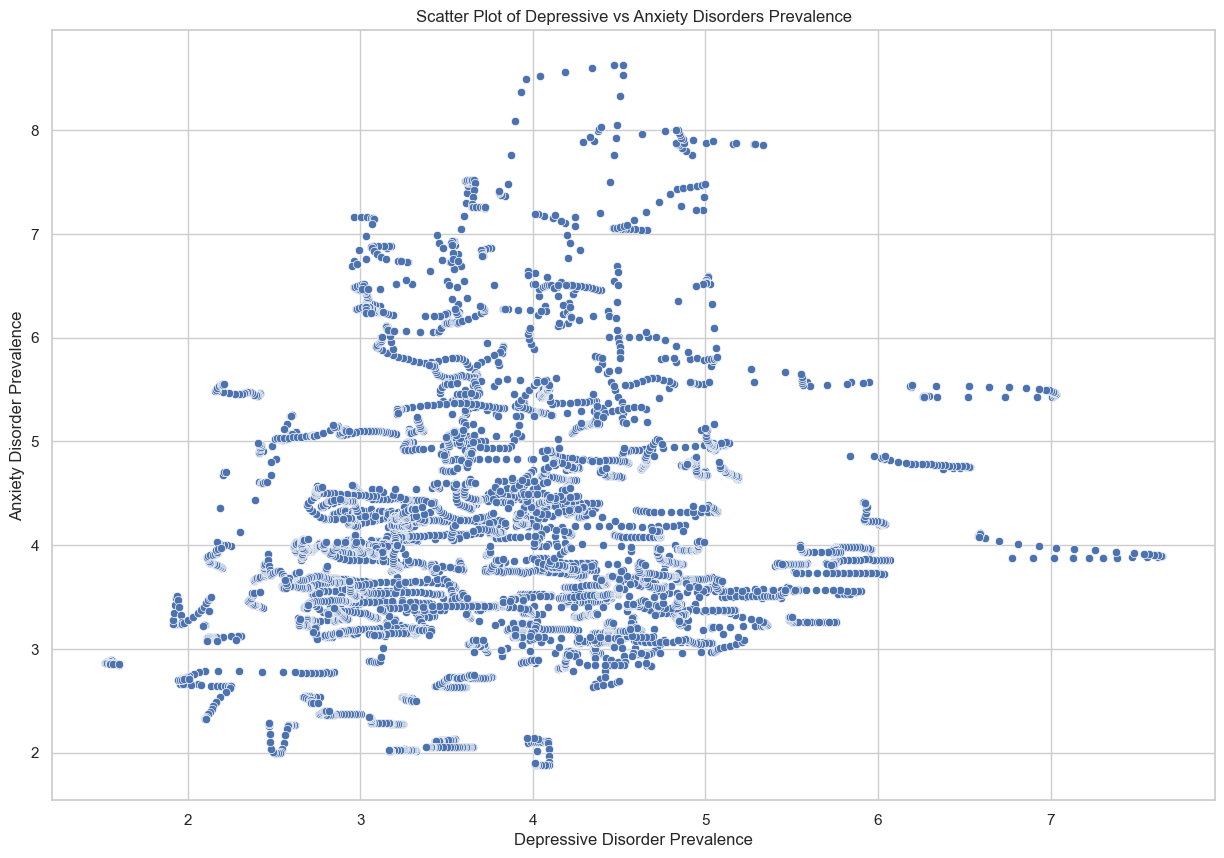

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Histogram for each disorder
disorders = ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating']

plt.figure(figsize=(15, 10))
for i, disorder in enumerate(disorders, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[disorder].dropna(), kde=True)
    plt.title(f'Histogram of {disorder} Disorder Prevalence')
plt.tight_layout()
plt.show()

# Box plots for each disorder
plt.figure(figsize=(15, 10))
for i, disorder in enumerate(disorders, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[disorder].dropna())
    plt.title(f'Box Plot of {disorder} Disorder Prevalence')
plt.tight_layout()
plt.show()

# Pair plot to see relationships between disorders
sns.pairplot(df[disorders])
plt.show()

# Heatmap to visualize correlations between disorders
plt.figure(figsize=(10, 6))
corr_matrix = df[disorders].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Mental Disorders Prevalence')
plt.show()

# Scatter plots to visualize relationships between specific pairs of disorders
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Depressive', y='Anxiety', data=df)
plt.title('Scatter Plot of Depressive vs Anxiety Disorders Prevalence')
plt.xlabel('Depressive Disorder Prevalence')
plt.ylabel('Anxiety Disorder Prevalence')
plt.show()


# Some more Specific Visulizations to get Insights from Data

# 1. Time Series Analysis
Analyzing the prevalence of each disorder over time for different countries can provide insights into trends and patterns.

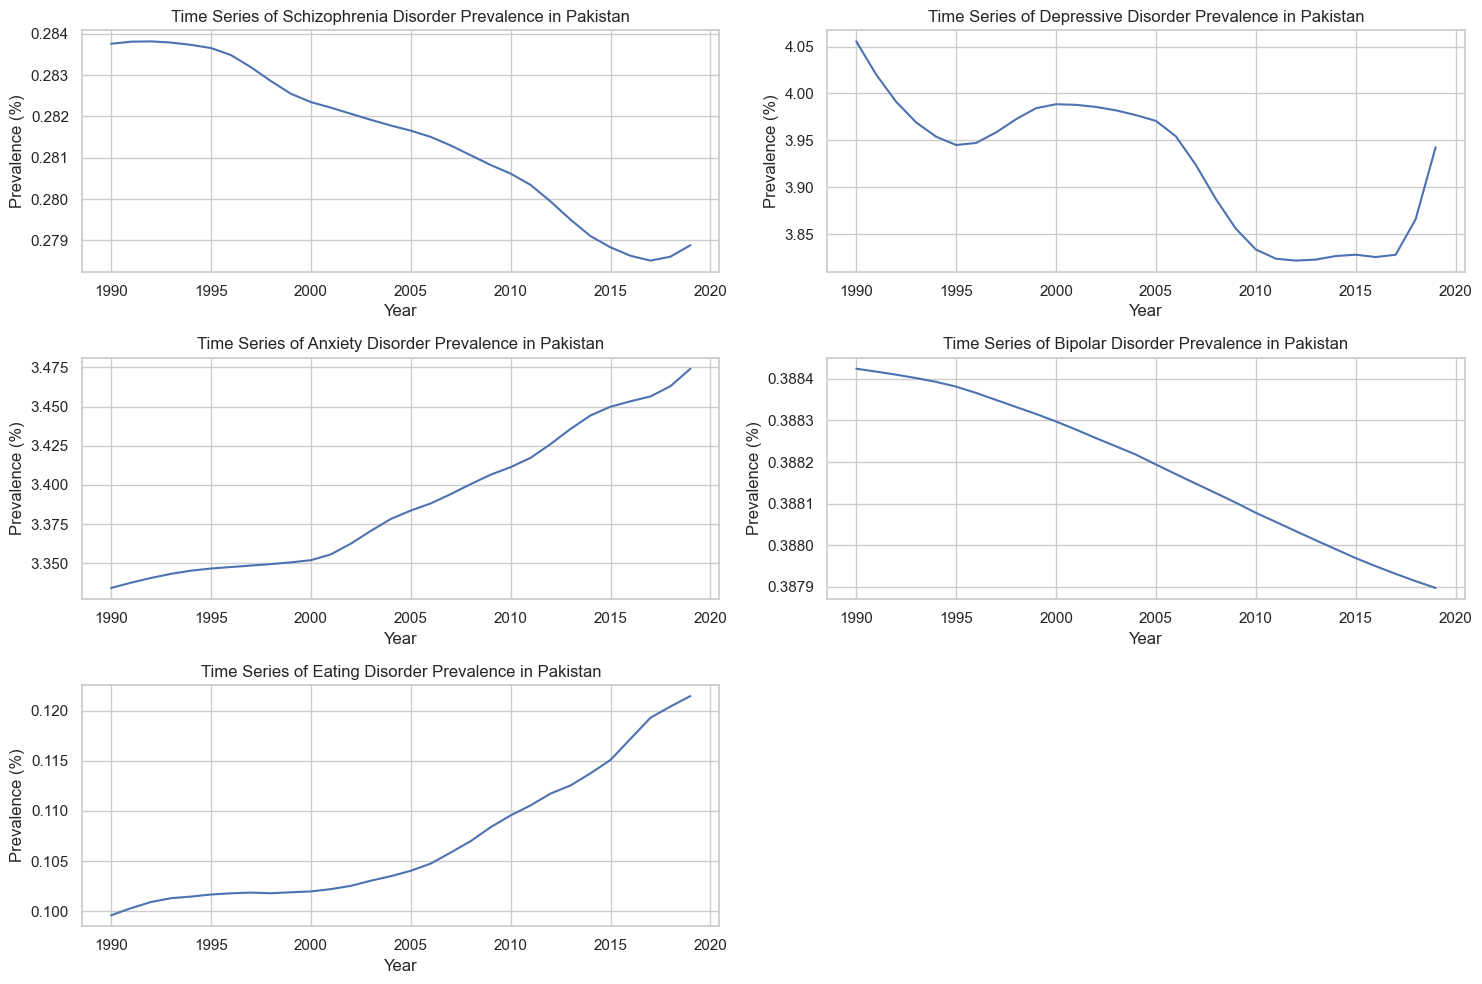

In [14]:
# Time series plot for each disorder for a specific country
country = 'Pakistan'  # Change this to any country of interest
country_data = df[df['Entity'] == country]

plt.figure(figsize=(15, 10))
for i, disorder in enumerate(disorders, 1):
    plt.subplot(3, 2, i)
    plt.plot(country_data['Year'], country_data[disorder])
    plt.title(f'Time Series of {disorder} Disorder Prevalence in {country}')
    plt.xlabel('Year')
    plt.ylabel('Prevalence (%)')
plt.tight_layout()
plt.show()


# 2. Geographical Analysis
Visualizing the prevalence of disorders on a world map can help identify geographical patterns and regions with higher prevalence rates.

C:\Users\HP\AppData\Local\Temp\ipykernel_20584\758179078.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


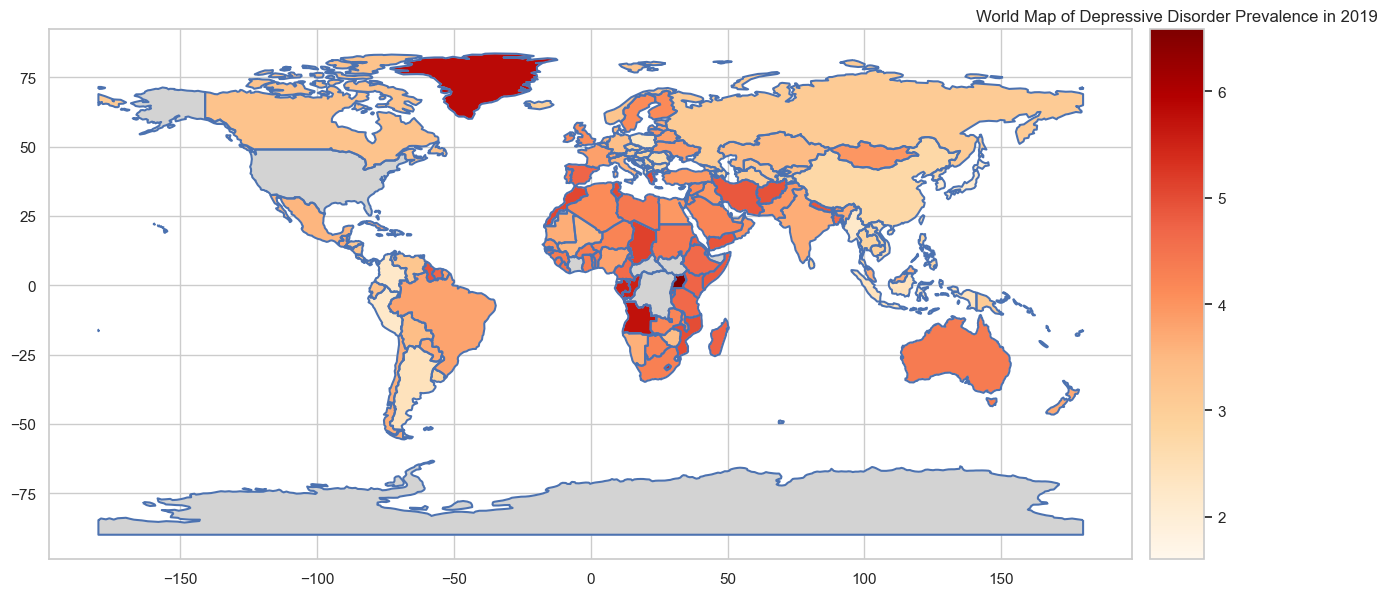

In [9]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# World map with disorder prevalence
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot for a specific year and disorder
year = 2019  # Change this to any year of interest
disorder = 'Depressive'  # Change this to any disorder of interest

# Merge the world map with the dataset
world = world.merge(df[df['Year'] == year][['Entity', disorder]], left_on='name', right_on='Entity', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.boundary.plot(ax=ax)
world.plot(column=disorder, ax=ax, legend=True, cax=cax, cmap='OrRd', missing_kwds={'color': 'lightgrey'})
plt.title(f'World Map of {disorder} Disorder Prevalence in {year}')
plt.show()


## Key Findings:
Countries like Greenland and Angola have most highest Value of Depressive Disorder.

# 5. Trends Over Time for Multiple Countries
Using line plots to show trends of disorders over time for multiple countries.

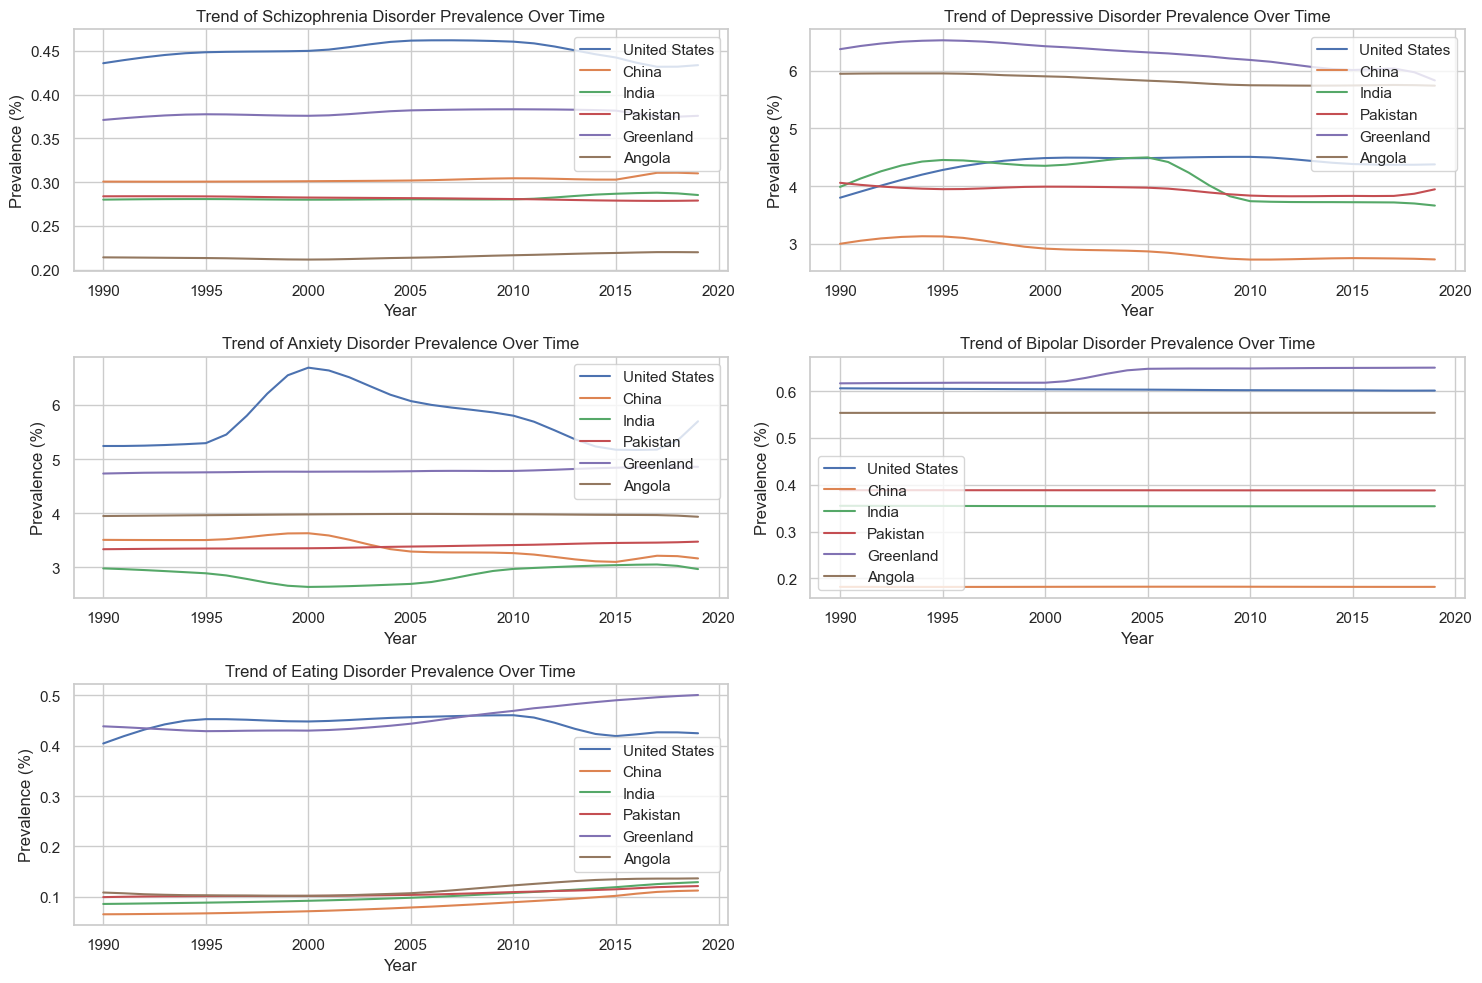

In [19]:
# Line plots to show trends of disorders over time for multiple countries
countries = ['United States', 'China', 'India', "Pakistan", "Greenland", "Angola"]  # Change these to any countries of interest
plt.figure(figsize=(15, 10))
for i, disorder in enumerate(disorders, 1):
    plt.subplot(3, 2, i)
    for country in countries:
        country_data = df[df['Entity'] == country]
        plt.plot(country_data['Year'], country_data[disorder], label=country)
    plt.title(f'Trend of {disorder} Disorder Prevalence Over Time')
    plt.xlabel('Year')
    plt.ylabel('Prevalence (%)')
    plt.legend()
plt.tight_layout()
plt.show()


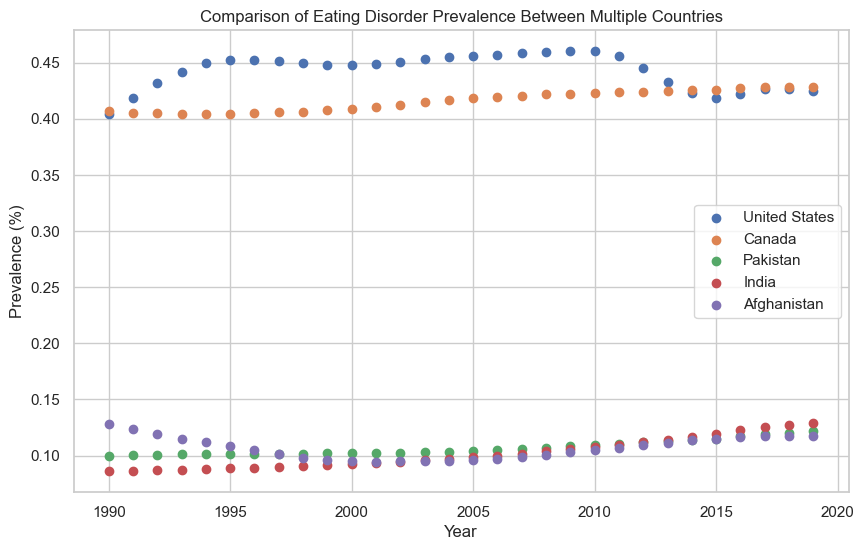

In [24]:
# Scatter plots to compare the prevalence of a specific disorder between pairs of countries
country1 = 'United States'  # Change this to any country of interest
country2 = 'Canada'  # Change this to any country of interest
country3 = "Pakistan"
country4 = "India"
country5 = "Afghanistan"
country1_data = df[df['Entity'] == country1]
country2_data = df[df['Entity'] == country2]
country3_data = df[df['Entity'] == country3]
country4_data = df[df['Entity'] == country4]
country5_data = df[df['Entity'] == country5]

plt.figure(figsize=(10, 6))
plt.scatter(country1_data['Year'], country1_data[disorder], label=country1)
plt.scatter(country2_data['Year'], country2_data[disorder], label=country2)
plt.scatter(country3_data['Year'], country3_data[disorder], label=country3)
plt.scatter(country4_data['Year'], country4_data[disorder], label=country4)
plt.scatter(country5_data['Year'], country5_data[disorder], label=country5)
plt.title(f'Comparison of {disorder} Disorder Prevalence Between Multiple Countries')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend()
plt.show()


The Visulizations added throughout the Report are Self explainatory and one can get a good idea of Different Trends and Information.